In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import data

In [4]:
from datetime import datetime

In [5]:
import pandas_datareader.data as web

In [6]:
#アメリカのハイテク企業の株価
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [9]:
#リストにある4社の株価をヤフーから取得
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'google', start, end)

In [10]:
type(AAPL)

pandas.core.frame.DataFrame

In [11]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,144.870518,145.826335,143.983187,145.006335,2.729231e+07
std,16.494027,16.536344,16.210360,16.371004,1.135940e+07
min,109.170000,110.030000,108.250000,109.110000,1.402667e+07
25%,137.635000,138.135000,136.875000,137.895000,2.045493e+07
50%,145.870000,147.200000,145.110000,146.340000,2.450730e+07
75%,156.475000,157.385000,155.190000,156.085000,3.048282e+07
max,175.110000,176.240000,174.650000,176.240000,1.119850e+08


In [12]:
AAPL.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-11-28,111.43,112.46,111.39,111.57,27193983
2016-11-29,110.78,112.03,110.07,111.46,28528750
2016-11-30,111.60,112.20,110.27,110.52,36162258
2016-12-01,110.36,110.94,109.03,109.49,37086862
2016-12-02,109.17,110.09,108.85,109.90,26527997


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-11-28 to 2017-11-24
Data columns (total 5 columns):
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


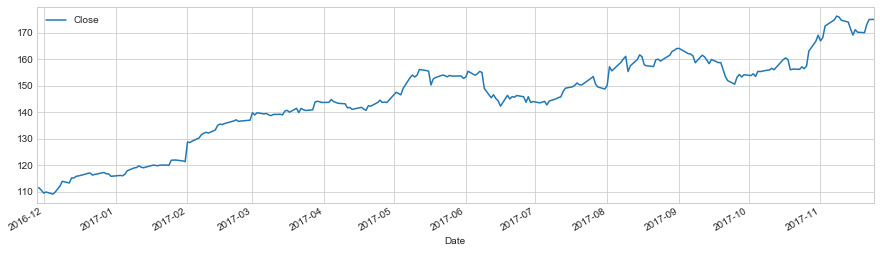

In [15]:
AAPL['Close'].plot(legend=True, figsize=(15,4))

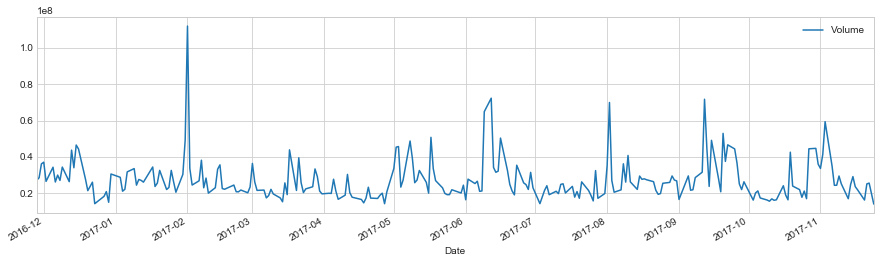

In [16]:
AAPL['Volume'].plot(legend=True, figsize=(15,4))

In [33]:
AAPL['Close'].rolling(10).mean()

Date
2016-11-28        NaN
2016-11-29        NaN
2016-11-30        NaN
2016-12-01        NaN
2016-12-02        NaN
2016-12-05        NaN
2016-12-06        NaN
2016-12-07        NaN
2016-12-08        NaN
2016-12-09    110.910
2016-12-12    111.083
2016-12-13    111.456
2016-12-14    111.923
2016-12-15    112.556
2016-12-16    113.163
2016-12-19    113.916
2016-12-20    114.616
2016-12-21    115.219
2016-12-22    115.636
2016-12-23    115.893
2016-12-27    116.289
2016-12-28    116.446
2016-12-29    116.600
2016-12-30    116.600
2017-01-03    116.618
2017-01-04    116.556
2017-01-05    116.522
2017-01-06    116.607
2017-01-09    116.877
2017-01-10    117.136
               ...   
2017-10-13    155.374
2017-10-16    155.981
2017-10-17    156.580
2017-10-18    157.208
2017-10-19    157.267
2017-10-20    157.362
2017-10-23    157.395
2017-10-24    157.515
2017-10-25    157.501
2017-10-26    157.642
2017-10-27    158.248
2017-10-30    158.932
2017-10-31    159.789
2017-11-01    160.502
2017-

In [34]:
#移動平均線を書く
#新しい列名を作って移動平均を格納する
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['Close'].rolling(ma).mean()

In [35]:
AAPL.head(15)

,Open,High,Low,Close,Volume,MA 10,MA 20,MA 50
Date,,,,,,,,
2016-11-28,111.43,112.46,111.39,111.57,27193983,NaN,NaN,NaN
2016-11-29,110.78,112.03,110.07,111.46,28528750,NaN,NaN,NaN
2016-11-30,111.60,112.20,110.27,110.52,36162258,NaN,NaN,NaN
2016-12-01,110.36,110.94,109.03,109.49,37086862,NaN,NaN,NaN
2016-12-02,109.17,110.09,108.85,109.90,26527997,NaN,NaN,NaN
2016-12-05,110.00,110.03,108.25,109.11,34324540,NaN,NaN,NaN
2016-12-06,109.50,110.36,109.19,109.95,26195462,NaN,NaN,NaN
2016-12-07,109.26,111.19,109.16,111.03,29998719,NaN,NaN,NaN
2016-12-08,110.86,112.43,110.60,112.12,27068316,NaN,NaN,NaN


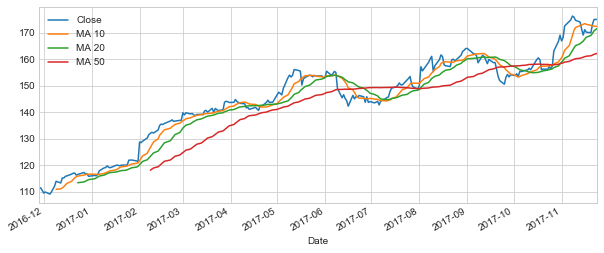

In [36]:
AAPL[['Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [37]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()

In [38]:
AAPL.head()

,Open,High,Low,Close,Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,
2016-11-28,111.43,112.46,111.39,111.57,27193983,NaN,NaN,NaN,NaN
2016-11-29,110.78,112.03,110.07,111.46,28528750,NaN,NaN,NaN,-0.000986
2016-11-30,111.60,112.20,110.27,110.52,36162258,NaN,NaN,NaN,-0.008434
2016-12-01,110.36,110.94,109.03,109.49,37086862,NaN,NaN,NaN,-0.009320
2016-12-02,109.17,110.09,108.85,109.90,26527997,NaN,NaN,NaN,0.003745


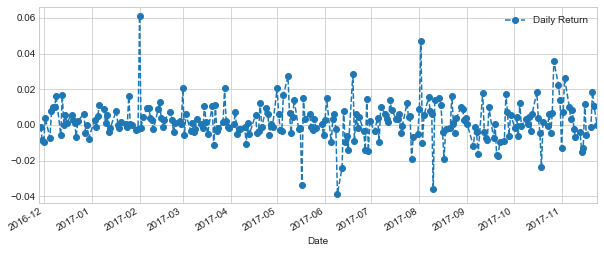

In [40]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

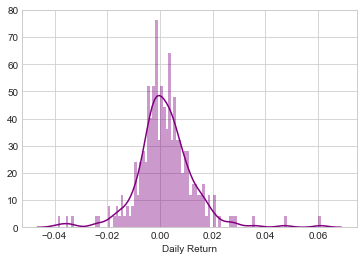

In [41]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

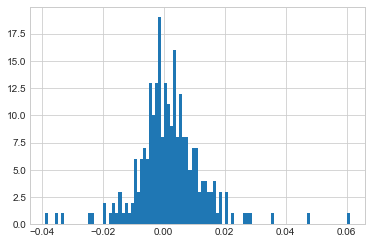

In [42]:
AAPL['Daily Return'].hist(bins=100)

In [44]:
closing_df = web.DataReader(['AAPL', 'GOOG', 'MSFT', 'AMZN'], 'google', start, end)['Close']

In [46]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-11-28,111.57,766.77,768.24,60.61
2016-11-29,111.46,762.52,770.84,61.09
2016-11-30,110.52,750.57,758.04,60.26
2016-12-01,109.49,743.65,747.92,59.20
2016-12-02,109.90,740.34,750.50,59.25


In [47]:
tech_rets = closing_df.pct_change()

In [48]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-11-28,NaN,NaN,NaN,NaN
2016-11-29,-0.000986,-0.005543,0.003384,0.007919
2016-11-30,-0.008434,-0.015672,-0.016605,-0.013587
2016-12-01,-0.009320,-0.009220,-0.013350,-0.017590
2016-12-02,0.003745,-0.004451,0.003450,0.000845


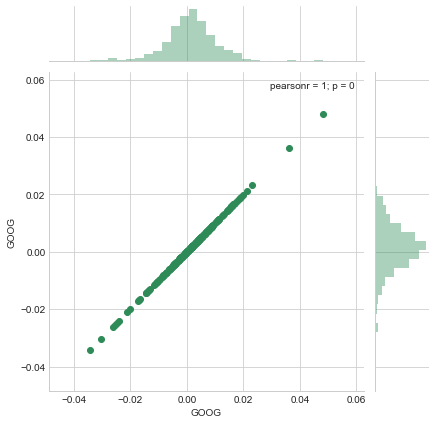

In [50]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

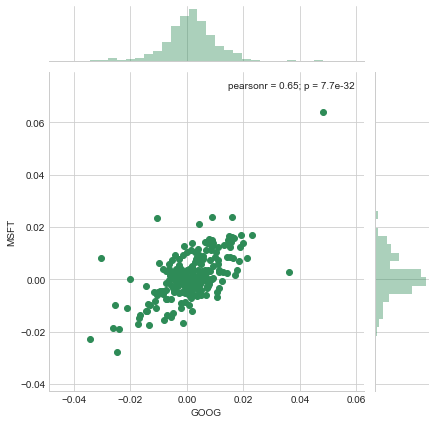

In [51]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')